# Análisis descriptivo - Stock y precios

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pylab import rcParams
import seaborn as sb

import scipy
from scipy.stats.stats import pearsonr

In [2]:
#import CSV datasets

#dir(sp.read_csv)

# URLData1='https://raw.githubusercontent.com/carlosqu/TesisUniandes/master/Data/table4.txt'
# URLData2='https://raw.githubusercontent.com/carlosqu/TesisUniandes/master/Data/table5.txt'
# URLData3='https://raw.githubusercontent.com/carlosqu/TesisUniandes/master/Data/table6.txt'
# URLData4='https://raw.githubusercontent.com/carlosqu/TesisUniandes/master/Data/table11.txt'
# URLData5='https://raw.githubusercontent.com/carlosqu/TesisUniandes/master/Data/table12.txt'
# URLData6='https://raw.githubusercontent.com/carlosqu/TesisUniandes/master/Data/table13.txt'
# URLData7='https://raw.githubusercontent.com/carlosqu/TesisUniandes/master/Data/table14.txt'
# St_crude= pd.read_csv(URLData1)
# St_gas= pd.read_csv(URLData2)
# St_others= pd.read_csv(URLData3)
# Sp_crude= pd.read_csv(URLData4,nrows=12)
# Sp_fuel= pd.read_csv(URLData5)
# Fut_all= pd.read_csv(URLData6)
# Pri_gas= pd.read_csv(URLData7)
# print(St_crude) #se observa que tiene data actual,-1week,-1year,-2year
#print(St_gas) #se observa que tiene data actual,-1week,-1year,-2year
#print(St_others) #se observa que tiene data actual,-1week,-1year,-2year
#print(Sp_crude) #se observa que tiene data actual,mes,dia,semana, pero la importación se debe ajustar a sólo la mensual

In [3]:
#import EXCEL datasets

#dir(pd.read_csv)

URLData8='https://github.com/carlosqu/TesisUniandes/blob/master/Data/psw04.xls?raw=true'
URLData9='https://github.com/carlosqu/TesisUniandes/blob/master/Data/psw05.xls?raw=true'
URLData10='https://github.com/carlosqu/TesisUniandes/blob/master/Data/psw06.xls?raw=true'
URLData11='https://github.com/carlosqu/TesisUniandes/blob/master/Data/psw11.xls?raw=true'
URLData12='https://github.com/carlosqu/TesisUniandes/blob/master/Data/psw12.xls?raw=true'
URLData13='https://github.com/carlosqu/TesisUniandes/blob/master/Data/psw13.xls?raw=true'
URLData14='https://github.com/carlosqu/TesisUniandes/blob/master/Data/psw14.xls?raw=true'

#separate importation due to the amount of sheets

St_crude=pd.read_excel(URLData8,sheetname='Data 1',skiprows=2)
St_gas=pd.read_excel(URLData9,sheetname='Data 1',skiprows=2)
St_others=pd.read_excel(URLData10,sheetname='Data 1',skiprows=2)

Sp_crude1=pd.read_excel(URLData11,sheetname='Data 1',skiprows=2)
Sp_crude2=pd.read_excel(URLData11,sheetname='Data 2',skiprows=2)
Sp_crude3=pd.read_excel(URLData11,sheetname='Data 3',skiprows=2)
Sp_crude4=pd.read_excel(URLData11,sheetname='Data 4',skiprows=2)

Sp_fuel1=pd.read_excel(URLData12,sheetname='Data 1',skiprows=2)
Sp_fuel2=pd.read_excel(URLData12,sheetname='Data 2',skiprows=2)
Sp_fuel3=pd.read_excel(URLData12,sheetname='Data 3',skiprows=2)

Fut_all1=pd.read_excel(URLData13,sheetname='Data 1',skiprows=2)
Fut_all2=pd.read_excel(URLData13,sheetname='Data 2',skiprows=2)
Fut_all3=pd.read_excel(URLData13,sheetname='Data 3',skiprows=2)

Pri_gas1=pd.read_excel(URLData14,sheetname='Data 1',skiprows=2)
Pri_gas2=pd.read_excel(URLData14,sheetname='Data 2',skiprows=2)

In [4]:
#recognize the variables for each dataset...try to merge the different sheets of the same Excel file

# St_crude.columns
# St_gas.columns
# St_others.columns

# Sp_crude1.columns
# Sp_crude2.columns
# Sp_crude3.columns
# Sp_crude4.columns

# Sp_fuel1.columns
# Sp_fuel2.columns
# Sp_fuel3.columns

# Fut_all1.columns
# Fut_all2.columns
# Fut_all3.columns

# Pri_gas1.columns
# Pri_gas2.columns

In [4]:
#Merging dataframes

a=pd.merge(Sp_crude1,Sp_crude2,on='Date',how='outer')
b=pd.merge(a,Sp_crude3,on='Date',how='outer')
Sp_crude=pd.merge(b,Sp_crude4,on='Date',how='outer')

c=pd.merge(Sp_fuel2,Sp_fuel1,on='Date',how='outer')
Sp_fuel=pd.merge(c,Sp_fuel3,on='Date',how='outer')

d=pd.merge(Fut_all3,Fut_all1,on='Date',how='outer')
Fut_all=pd.merge(d,Fut_all2,on='Date',how='outer')

Pri_gas=Pri_gas1

In [15]:
#brief of descriptives

# St_crude.describe() #WEEKLY
# St_gas.describe() #WEEKLY
# St_others.describe() #WEEKLY
# Sp_crude.describe() #DAILY
# Sp_fuel.describe() #DAILY
# Fut_all.describe() #DAILY
# Pri_gas.describe() #WEEKLY

# St_crude.columns 
#'Weekly Gulf Coast (PADD 3) Ending Stocks excluding SPR of Crude Oil  (Thousand Barrels)'

# St_gas.columns
#'Weekly Gulf Coast (PADD 3) Ending Stocks of Conventional Motor Gasoline  (Thousand Barrels)'
# 'Weekly Gulf Coast (PADD 3) Ending Stocks of Finished Motor Gasoline  (Thousand Barrels)'
# 'Weekly Gulf Coast (PADD 3) Ending Stocks of Fuel Ethanol  (Thousand Barrels)'
# 'Weekly Gulf Coast (PADD 3) Ending Stocks of Gasoline Blending Components  (Thousand Barrels)'
# 'Weekly Gulf Coast (PADD 3) Ending Stocks of Reformulated Motor Gasoline  (Thousand Barrels)'
# 'Weekly Gulf Coast (PADD 3) Ending Stocks of Total Gasoline  (Thousand Barrels)'

# St_others.columns
# 'Weekly Gulf Coast (PADD 3) Ending Stocks of Distillate Fuel Oil  (Thousand Barrels)'
# 'Weekly Gulf Coast (PADD 3) Ending Stocks of Distillate Fuel Oil, 0 to 15 ppm Sulfur  (Thousand Barrels)'
# 'Weekly Gulf Coast (PADD 3) Ending Stocks of Distillate Fuel Oil, Greater than 15 to 500 ppm Sulfur  (Thousand Barrels)'
# 'Weekly Gulf Coast (PADD 3) Ending Stocks of Distillate Fuel Oil, Greater Than 500 ppm Sulfur  (Thousand Barrels)'
# 'Weekly Gulf Coast (PADD 3) Ending Stocks of Kerosene-Type Jet Fuel  (Thousand Barrels)'
# 'Weekly Gulf Coast (PADD 3) Ending Stocks of Propane and Propylene  (Thousand Barrels)'
# 'Weekly Gulf Coast (PADD 3) Ending Stocks of Residual Fuel Oil  (Thousand Barrels)'

# Sp_crude.columns
#all of them

# Sp_fuel.columns
#all of them

# Fut_all.columns
#all of them

# Pri_gas.columns
#all of them

In [5]:
#then we decide to merge the set as the following: 1_STOCKS-SPOT PRICES, 2_STOCKS-FUTURE PRICES, 3_STOCKS-GAS PRICES

spots=pd.merge(Sp_crude,Sp_fuel,on='Date',how='outer')

e=pd.merge(St_crude[[
        'Date',
        'Weekly Gulf Coast (PADD 3) Ending Stocks excluding SPR of Crude Oil  (Thousand Barrels)'
    ]],
    St_gas[[
        'Date',
        'Weekly Gulf Coast (PADD 3) Ending Stocks of Conventional Motor Gasoline  (Thousand Barrels)',
        'Weekly Gulf Coast (PADD 3) Ending Stocks of Finished Motor Gasoline  (Thousand Barrels)',
        'Weekly Gulf Coast (PADD 3) Ending Stocks of Fuel Ethanol  (Thousand Barrels)',
        'Weekly Gulf Coast (PADD 3) Ending Stocks of Gasoline Blending Components  (Thousand Barrels)',
        'Weekly Gulf Coast (PADD 3) Ending Stocks of Reformulated Motor Gasoline  (Thousand Barrels)',
        'Weekly Gulf Coast (PADD 3) Ending Stocks of Total Gasoline  (Thousand Barrels)'
    ]],
    on='Date',how='outer')

stocks=pd.merge(e,
    St_others[[
        'Date',
        'Weekly Gulf Coast (PADD 3) Ending Stocks of Distillate Fuel Oil  (Thousand Barrels)',
        'Weekly Gulf Coast (PADD 3) Ending Stocks of Distillate Fuel Oil, 0 to 15 ppm Sulfur  (Thousand Barrels)',
        'Weekly Gulf Coast (PADD 3) Ending Stocks of Distillate Fuel Oil, Greater than 15 to 500 ppm Sulfur  (Thousand Barrels)',
        'Weekly Gulf Coast (PADD 3) Ending Stocks of Distillate Fuel Oil, Greater Than 500 ppm Sulfur  (Thousand Barrels)',
        'Weekly Gulf Coast (PADD 3) Ending Stocks of Kerosene-Type Jet Fuel  (Thousand Barrels)',
        'Weekly Gulf Coast (PADD 3) Ending Stocks of Propane and Propylene  (Thousand Barrels)',
        'Weekly Gulf Coast (PADD 3) Ending Stocks of Residual Fuel Oil  (Thousand Barrels)'
    ]],
    on='Date',how='outer')

#and we get ready the 3 final datasets

#1
ss=pd.merge(stocks,spots,on='Date',how='outer')

# #2
sf=pd.merge(stocks,Fut_all,on='Date',how='outer')

# #3
sg=pd.merge(stocks,Pri_gas,on='Date',how='outer')

In [164]:
#Finally, we have the datasets ready to evaluate Correlation
# ss
# sf
# sg

# sg=sg.sort_values(by=['Date'])

# export_excel = sg.to_excel (r'C:\Users\carlos_q\Desktop\export_dataframe3.xlsx', index = None, header=True)


#look for NANs 
# ss.describe()
# ss.shape
# ss.isnull().sum()
# ss.notnull().sum()
# ss.count()

# sf.describe()
# sf.shape
# sf.isnull().sum()
# sf.notnull().sum()
# sf.count()

# sg.describe()
# sg.shape
# sg.isnull().sum()
# sg.notnull().sum()
# sg.count()

#after that, we look for complete rows (with no NANs) to see if we get enough data to estimate

# ss1=ss
# ss1['full_count'] = ss1.apply(lambda x: x.count(), axis=1)

# sf1=sf
# sf1['full_count'] = sf1.apply(lambda x: x.count(), axis=1)

# sg1=sg
# sg1['full_count'] = sg1.apply(lambda x: x.count(), axis=1)

# pd.pivot_table(ss1, index='full_count', aggfunc='count')
# pd.pivot_table(sf1, index='full_count', aggfunc='count')
# pd.pivot_table(sg1, index='full_count', aggfunc='count')

# ss tiene 26/26
# sf tiene 28/28
# sg tiene 26/40

#WE GOT A PROBLEM ON 'sg'

In [6]:
#as we check 'sg' dataset, almost none week-key match due to days difference, so we'll normalize the Date into a monthly average

#first we create the monthly variable

sg2=sg

sg2['Date2'] = sg2['Date'].dt.year
sg2['Date3'] = sg2['Date'].dt.month

sg2['NewDate']=pd.to_datetime(sg2.Date2*10000+sg2.Date3*100+1,format='%Y%m%d')
sg3=pd.pivot_table(sg2, index='NewDate', aggfunc=np.mean)
sg3['NewDate']=pd.to_datetime(sg3.Date2*10000+sg3.Date3*100+1,format='%Y%m%d')

sg3['full_count'] = sg3.apply(lambda x: x.count(), axis=1)
pd.pivot_table(sg3, index='full_count', aggfunc='count')

,Date2,Date3,NewDate,Weekly California No 2 Diesel Retail Prices (Dollars per Gallon),Weekly Central Atlantic (PADD 1B) No 2 Diesel Retail Prices (Dollars per Gallon),Weekly Central Atlantic (PADD 1B) Regular All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly East Coast No 2 Diesel Retail Prices (Dollars per Gallon),Weekly East Coast Regular All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly Gulf Coast (PADD 3) Ending Stocks excluding SPR of Crude Oil (Thousand Barrels),Weekly Gulf Coast (PADD 3) Ending Stocks of Conventional Motor Gasoline (Thousand Barrels),...,Weekly Rocky Mountain Regular All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly U.S. All Grades Conventional Retail Gasoline Prices (Dollars per Gallon),Weekly U.S. All Grades Reformulated Retail Gasoline Prices (Dollars per Gallon),Weekly U.S. Midgrade All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly U.S. No 2 Diesel Retail Prices (Dollars per Gallon),Weekly U.S. Premium All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly U.S. Regular All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly West Coast No 2 Diesel Retail Prices (Dollars per Gallon),Weekly West Coast Regular All Formulations Retail Gasoline Prices (Dollars per Gallon)
full_count,,,,,,,,,,,,,,,,,,,,,
3,89,89,89,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,7,7,7,0,0,0,0,0,7,0,...,0,0,0,0,0,0,0,0,0,0
9,21,21,21,0,0,0,0,0,21,0,...,0,0,0,0,0,0,0,21,0,0
14,10,10,10,0,0,0,0,10,10,0,...,10,0,0,0,0,0,0,10,0,10
15,1,1,1,0,0,0,0,1,1,0,...,1,0,0,0,0,0,0,1,0,1
19,1,1,1,0,0,1,0,1,1,0,...,1,1,0,0,0,0,0,1,0,1
21,5,5,5,0,0,5,0,5,5,0,...,5,5,0,0,0,0,0,5,0,5
22,3,3,3,0,0,3,0,3,3,0,...,3,3,0,0,0,0,0,3,0,3
24,2,2,2,0,0,2,0,2,2,2,...,2,2,0,0,0,0,0,2,0,2


### Análisis visual

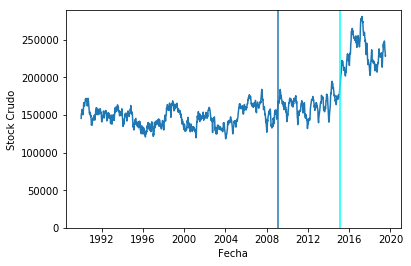

In [83]:
plt.plot(ss['Date'], ss['Weekly Gulf Coast (PADD 3) Ending Stocks excluding SPR of Crude Oil  (Thousand Barrels)'])
plt.xlabel('Fecha')
plt.ylabel('Stock Crudo')
plt.ylim(bottom=0) 
plt.axvline(x='02/01/2009') #10 years window
plt.axvline(x='02/01/2015',c=[0, 1,1,1]) #new average window

plt.show()

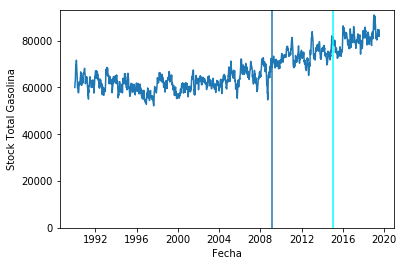

In [85]:
plt.plot(ss['Date'], ss['Weekly Gulf Coast (PADD 3) Ending Stocks of Total Gasoline  (Thousand Barrels)'])
plt.xlabel('Fecha')
plt.ylabel('Stock Total Gasolina')
plt.ylim(bottom=0) 
plt.axvline(x='02/01/2009') #10 years window
plt.axvline(x='02/01/2015',c=[0, 1,1,1]) #new average window

plt.show()

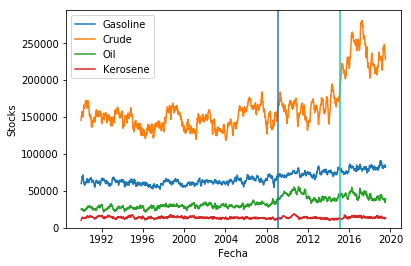

In [110]:
plt.plot(ss['Date'], ss['Weekly Gulf Coast (PADD 3) Ending Stocks of Total Gasoline  (Thousand Barrels)'],label='Gasoline')
plt.plot(ss['Date'], ss['Weekly Gulf Coast (PADD 3) Ending Stocks excluding SPR of Crude Oil  (Thousand Barrels)'],label='Crude')
plt.plot(ss['Date'], ss['Weekly Gulf Coast (PADD 3) Ending Stocks of Distillate Fuel Oil  (Thousand Barrels)'],label='Oil')
plt.plot(ss['Date'], ss['Weekly Gulf Coast (PADD 3) Ending Stocks of Kerosene-Type Jet Fuel  (Thousand Barrels)'],label='Kerosene')

plt.xlabel('Fecha')
plt.ylabel('Stocks')

plt.ylim(bottom=0) 

plt.axvline(x='02/01/2009') #10 years window
plt.axvline(x='02/01/2015',c=[0.1, 0.8,0.7,1]) #new average window

plt.legend()
plt.show()

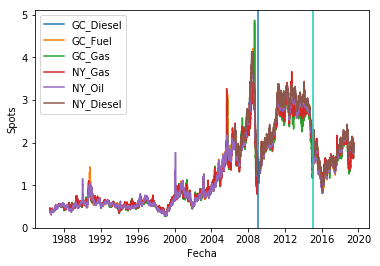

In [7]:
ss=ss.sort_values(by=['Date'])

plt.plot(ss['Date'], ss['U.S. Gulf Coast Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon)'],label='GC_Diesel')
plt.plot(ss['Date'], ss['U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB (Dollars per Gallon)'],label='GC_Fuel')
plt.plot(ss['Date'], ss['U.S. Gulf Coast Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)'],label='GC_Gas')
plt.plot(ss['Date'], ss['New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)'],label='NY_Gas')
plt.plot(ss['Date'], ss['New York Harbor No. 2 Heating Oil Spot Price FOB (Dollars per Gallon)'],label='NY_Oil')
plt.plot(ss['Date'], ss['New York Harbor Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon)'],label='NY_Diesel')

plt.xlabel('Fecha')
plt.ylabel('Spots')

plt.ylim(bottom=0) 

plt.axvline(x='02/01/2009') #10 years window
plt.axvline(x='02/01/2015',c=[0.1, 0.8,0.7,1]) #new average window

plt.legend()
plt.show()

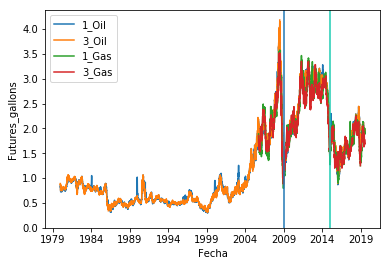

In [8]:
sf=sf.sort_values(by=['Date'])

plt.plot(sf['Date'], sf['New York Harbor No. 2 Heating Oil Future Contract 1 (Dollars per Gallon)'],label='1_Oil')
plt.plot(sf['Date'], sf['New York Harbor No. 2 Heating Oil Future Contract 3 (Dollars per Gallon)'],label='3_Oil')
plt.plot(sf['Date'], sf['New York Harbor Reformulated RBOB Regular Gasoline Future Contract 1 (Dollars per Gallon)'],label='1_Gas')
plt.plot(sf['Date'], sf['New York Harbor Reformulated RBOB Regular Gasoline Future Contract 3 (Dollars per Gallon)'],label='3_Gas')

plt.xlabel('Fecha')
plt.ylabel('Futures_gallons')

plt.ylim(bottom=0) 

plt.axvline(x='02/01/2009') #10 years window
plt.axvline(x='02/01/2015',c=[0.1, 0.8,0.7,1]) #new average window

plt.legend()
plt.show()

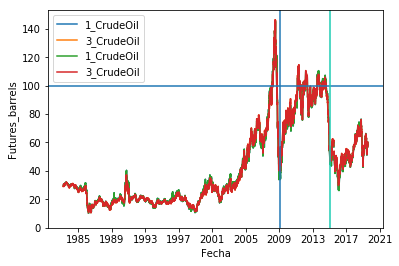

In [199]:
plt.plot(sf['Date'], sf['Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)'],label='1_CrudeOil')
plt.plot(sf['Date'], sf['Cushing, OK Crude Oil Future Contract 3 (Dollars per Barrel)'],label='3_CrudeOil')

plt.xlabel('Fecha')
plt.ylabel('Futures_barrels')

plt.ylim(bottom=0) 

plt.axhline(y=100)
plt.axvline(x='02/01/2009') #10 years window
plt.axvline(x='02/01/2015',c=[0.1, 0.8,0.7,1]) #new average window

plt.legend()
plt.show()

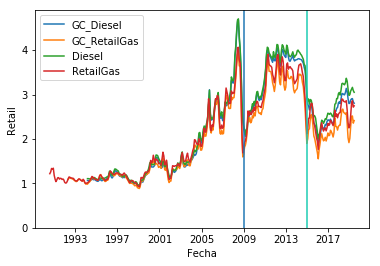

In [9]:
sg3=sg3.sort_values(by=['NewDate'])

plt.plot(sg3['NewDate'], sg3['Weekly Gulf Coast No 2 Diesel Retail Prices  (Dollars per Gallon)'],label='GC_Diesel')
plt.plot(sg3['NewDate'], sg3['Weekly Gulf Coast Regular All Formulations Retail Gasoline Prices  (Dollars per Gallon)'],label='GC_RetailGas')
plt.plot(sg3['NewDate'], sg3['Weekly U.S. No 2 Diesel Retail Prices  (Dollars per Gallon)'],label='Diesel')
plt.plot(sg3['NewDate'], sg3['Weekly U.S. Regular All Formulations Retail Gasoline Prices  (Dollars per Gallon)'],label='RetailGas')

plt.xlabel('Fecha')
plt.ylabel('Retail')

plt.ylim(bottom=0) 

plt.axvline(x='01/01/2009') #10 years window
plt.axvline(x='01/01/2015',c=[0.1, 0.8,0.7,1]) #new average window

plt.legend()
plt.show()

In [30]:
#Now we are ready to work with the datasets
# ss
# sf
# sg3

#Because we have to create two windows: 10y & 4y
# export_excel = ss.to_excel (r'C:\Users\carlos_q\Desktop\export_dataframe1.xlsx', index = None, header=True)
# export_excel = sf.to_excel (r'C:\Users\carlos_q\Desktop\export_dataframe2.xlsx', index = None, header=True)
# export_excel = sg3.to_excel (r'C:\Users\carlos_q\Desktop\export_dataframe3.xlsx', index = None, header=True)

#ss
# 2015-01-02 00:00:00
# 2009-01-02 00:00:00

#sf
# 2015-01-02 00:00:00
# 2009-01-02 00:00:00

#sg3
# 2015-01-01 00:00:00
# 2009-01-01 00:00:00

ss10 = ss[ss['Date']>'31/12/2008'] #U
ss4 = ss[ss['Date']>='01/01/2015'] #V

sf10 = sf[sf['Date']>'31/12/2008'] #W
sf4 = sf[sf['Date']>='01/01/2015'] #X

sg10 = sg3[sg3['NewDate']>'31/12/2008'] #Y
sg4 = sg3[sg3['NewDate']>='01/01/2015'] #Z

# Correlación - Stock y Precios Spot (10 años)

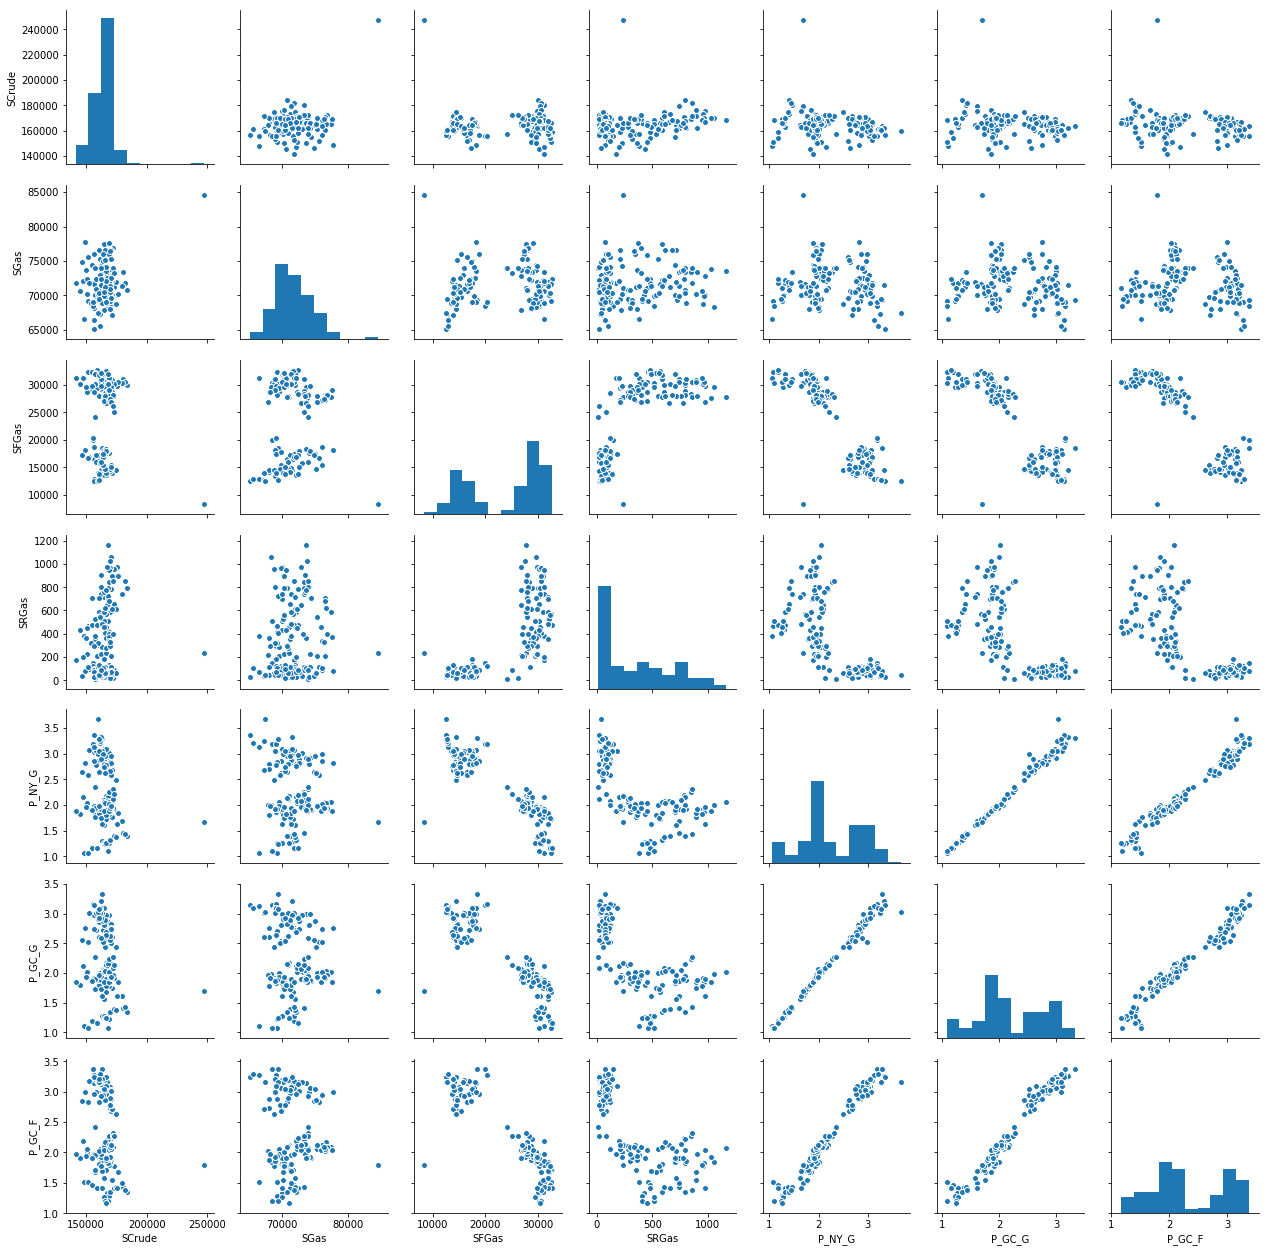

In [11]:
# To the beginning lets review the following assumptions before run the evaluation: 
# normal distribution of variables
# continiuous numeric variables
# variables linearly related

#lets filter the ss dataset
#'Weekly Gulf Coast (PADD 3) Ending Stocks excluding SPR of Crude Oil  (Thousand Barrels)'
#'Weekly Gulf Coast (PADD 3) Ending Stocks of Total Gasoline  (Thousand Barrels)'
#'Weekly Gulf Coast (PADD 3) Ending Stocks of Finished Motor Gasoline  (Thousand Barrels)'
#'Weekly Gulf Coast (PADD 3) Ending Stocks of Distillate Fuel Oil  (Thousand Barrels)'
#'New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)'
#'U.S. Gulf Coast Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)'
#'Los Angeles Reformulated RBOB Regular Gasoline Spot Price (Dollars per Gallon)'

U=ss10[[
        'Weekly Gulf Coast (PADD 3) Ending Stocks excluding SPR of Crude Oil  (Thousand Barrels)',
        'Weekly Gulf Coast (PADD 3) Ending Stocks of Total Gasoline  (Thousand Barrels)',
        'Weekly Gulf Coast (PADD 3) Ending Stocks of Finished Motor Gasoline  (Thousand Barrels)',
        'Weekly Gulf Coast (PADD 3) Ending Stocks of Reformulated Motor Gasoline  (Thousand Barrels)',
        'New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)',
        'U.S. Gulf Coast Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)',
        'U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB (Dollars per Gallon)'        
    ]]

U=U.rename(columns={
                            "Weekly Gulf Coast (PADD 3) Ending Stocks excluding SPR of Crude Oil  (Thousand Barrels)":"SCrude",
                            "Weekly Gulf Coast (PADD 3) Ending Stocks of Total Gasoline  (Thousand Barrels)":"SGas",
                            "Weekly Gulf Coast (PADD 3) Ending Stocks of Finished Motor Gasoline  (Thousand Barrels)":"SFGas",
                            "Weekly Gulf Coast (PADD 3) Ending Stocks of Reformulated Motor Gasoline  (Thousand Barrels)":"SRGas",
                            "New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)":"P_NY_G",
                            "U.S. Gulf Coast Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)":"P_GC_G",
                            "U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB (Dollars per Gallon)":"P_GC_F"})

U = U.replace({0:np.nan})
U.dropna(inplace=True)

sb.pairplot(U,dropna=True)
plt.show()

### Correlation Matrix: precios spot / stock

In [12]:
#finally...
corr=U.corr()
U.corr()

,SCrude,SGas,SFGas,SRGas,P_NY_G,P_GC_G,P_GC_F
SCrude,1.000000,0.287883,-0.087739,0.210861,-0.162328,-0.156520,-0.185108
SGas,0.287883,1.000000,0.071696,0.092045,-0.127478,-0.115148,-0.079114
SFGas,-0.087739,0.071696,1.000000,0.735639,-0.877950,-0.864604,-0.898097
SRGas,0.210861,0.092045,0.735639,1.000000,-0.668372,-0.664113,-0.718040
P_NY_G,-0.162328,-0.127478,-0.877950,-0.668372,1.000000,0.992214,0.981095
P_GC_G,-0.156520,-0.115148,-0.864604,-0.664113,0.992214,1.000000,0.982093
P_GC_F,-0.185108,-0.079114,-0.898097,-0.718040,0.981095,0.982093,1.000000


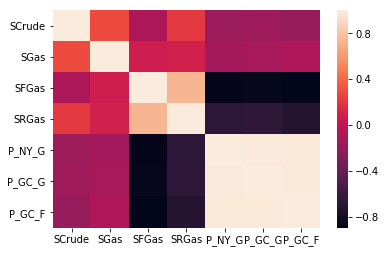

In [13]:
#graphically
sb.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)
plt.show()

# Correlación - Stock y Precios Spot (4 años)

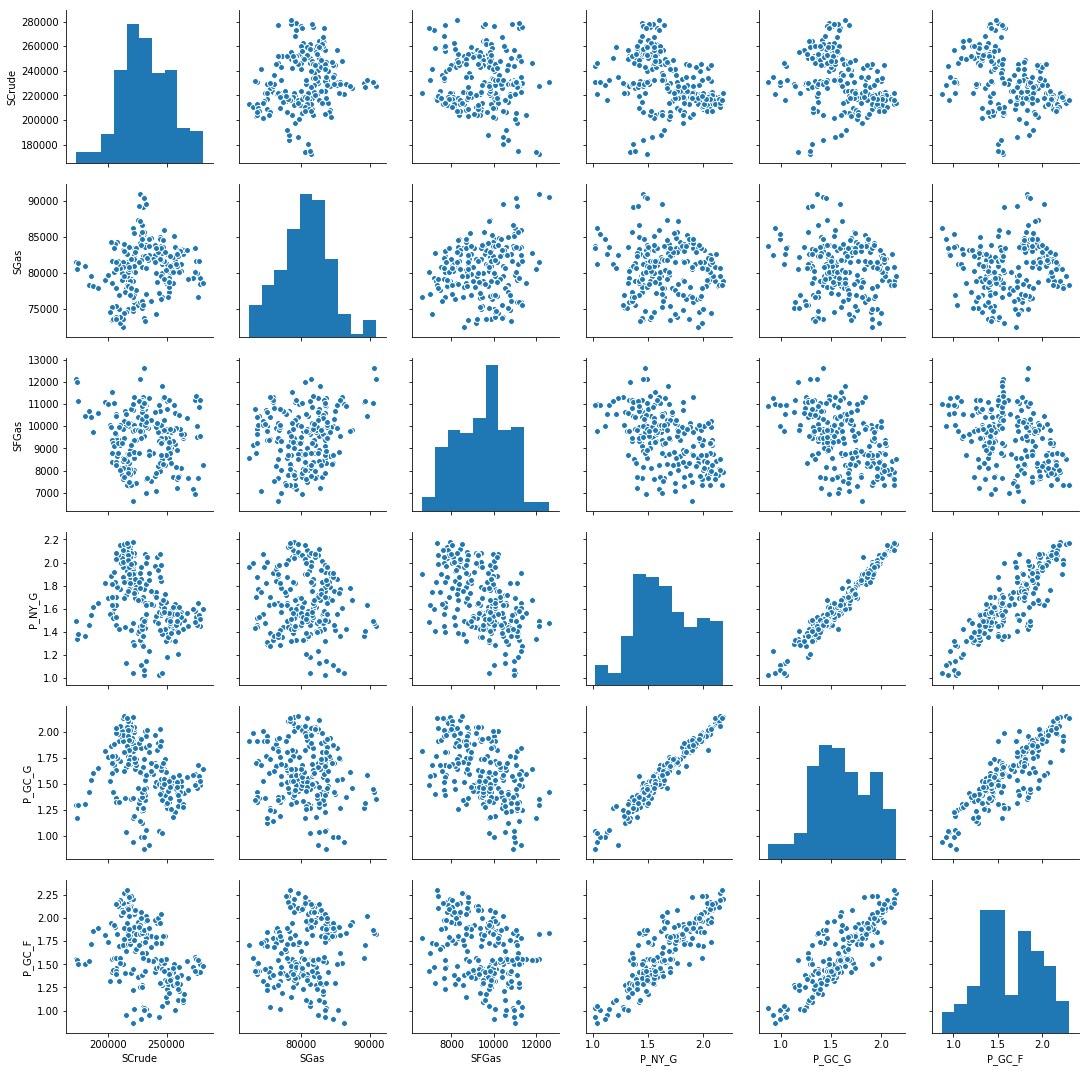

In [14]:
# To the beginning lets review the following assumptions before run the evaluation: 
# normal distribution of variables
# continiuous numeric variables
# variables linearly related

#lets filter the ss dataset
#'Weekly Gulf Coast (PADD 3) Ending Stocks excluding SPR of Crude Oil  (Thousand Barrels)'
#'Weekly Gulf Coast (PADD 3) Ending Stocks of Total Gasoline  (Thousand Barrels)'
#'Weekly Gulf Coast (PADD 3) Ending Stocks of Finished Motor Gasoline  (Thousand Barrels)'
#'Weekly Gulf Coast (PADD 3) Ending Stocks of Distillate Fuel Oil  (Thousand Barrels)'
#'New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)'
#'U.S. Gulf Coast Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)'
#'Los Angeles Reformulated RBOB Regular Gasoline Spot Price (Dollars per Gallon)'

V=ss4[[
        'Weekly Gulf Coast (PADD 3) Ending Stocks excluding SPR of Crude Oil  (Thousand Barrels)',
        'Weekly Gulf Coast (PADD 3) Ending Stocks of Total Gasoline  (Thousand Barrels)',
        'Weekly Gulf Coast (PADD 3) Ending Stocks of Finished Motor Gasoline  (Thousand Barrels)',
        'New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)',
        'U.S. Gulf Coast Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)',
        'U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB (Dollars per Gallon)'        
    ]]

V=V.rename(columns={
                            "Weekly Gulf Coast (PADD 3) Ending Stocks excluding SPR of Crude Oil  (Thousand Barrels)":"SCrude",
                            "Weekly Gulf Coast (PADD 3) Ending Stocks of Total Gasoline  (Thousand Barrels)":"SGas",
                            "Weekly Gulf Coast (PADD 3) Ending Stocks of Finished Motor Gasoline  (Thousand Barrels)":"SFGas",
                            "New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)":"P_NY_G",
                            "U.S. Gulf Coast Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)":"P_GC_G",
                            "U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB (Dollars per Gallon)":"P_GC_F"})

V = V.replace({0:np.nan})
V.dropna(inplace=True)

sb.pairplot(V,dropna=True)
plt.show()

In [15]:
#finally...
corr=V.corr()
V.corr()

,SCrude,SGas,SFGas,P_NY_G,P_GC_G,P_GC_F
SCrude,1.000000,0.187863,-0.089886,-0.347349,-0.300967,-0.428200
SGas,0.187863,1.000000,0.186758,-0.103725,-0.106840,0.123820
SFGas,-0.089886,0.186758,1.000000,-0.504636,-0.521151,-0.374905
P_NY_G,-0.347349,-0.103725,-0.504636,1.000000,0.978239,0.884862
P_GC_G,-0.300967,-0.106840,-0.521151,0.978239,1.000000,0.867663
P_GC_F,-0.428200,0.123820,-0.374905,0.884862,0.867663,1.000000


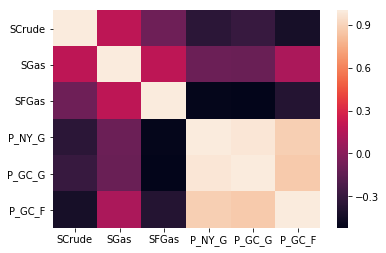

In [16]:
#graphically
sb.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)
plt.show()

# Correlación - Stock y Precios Futuros (10 años)

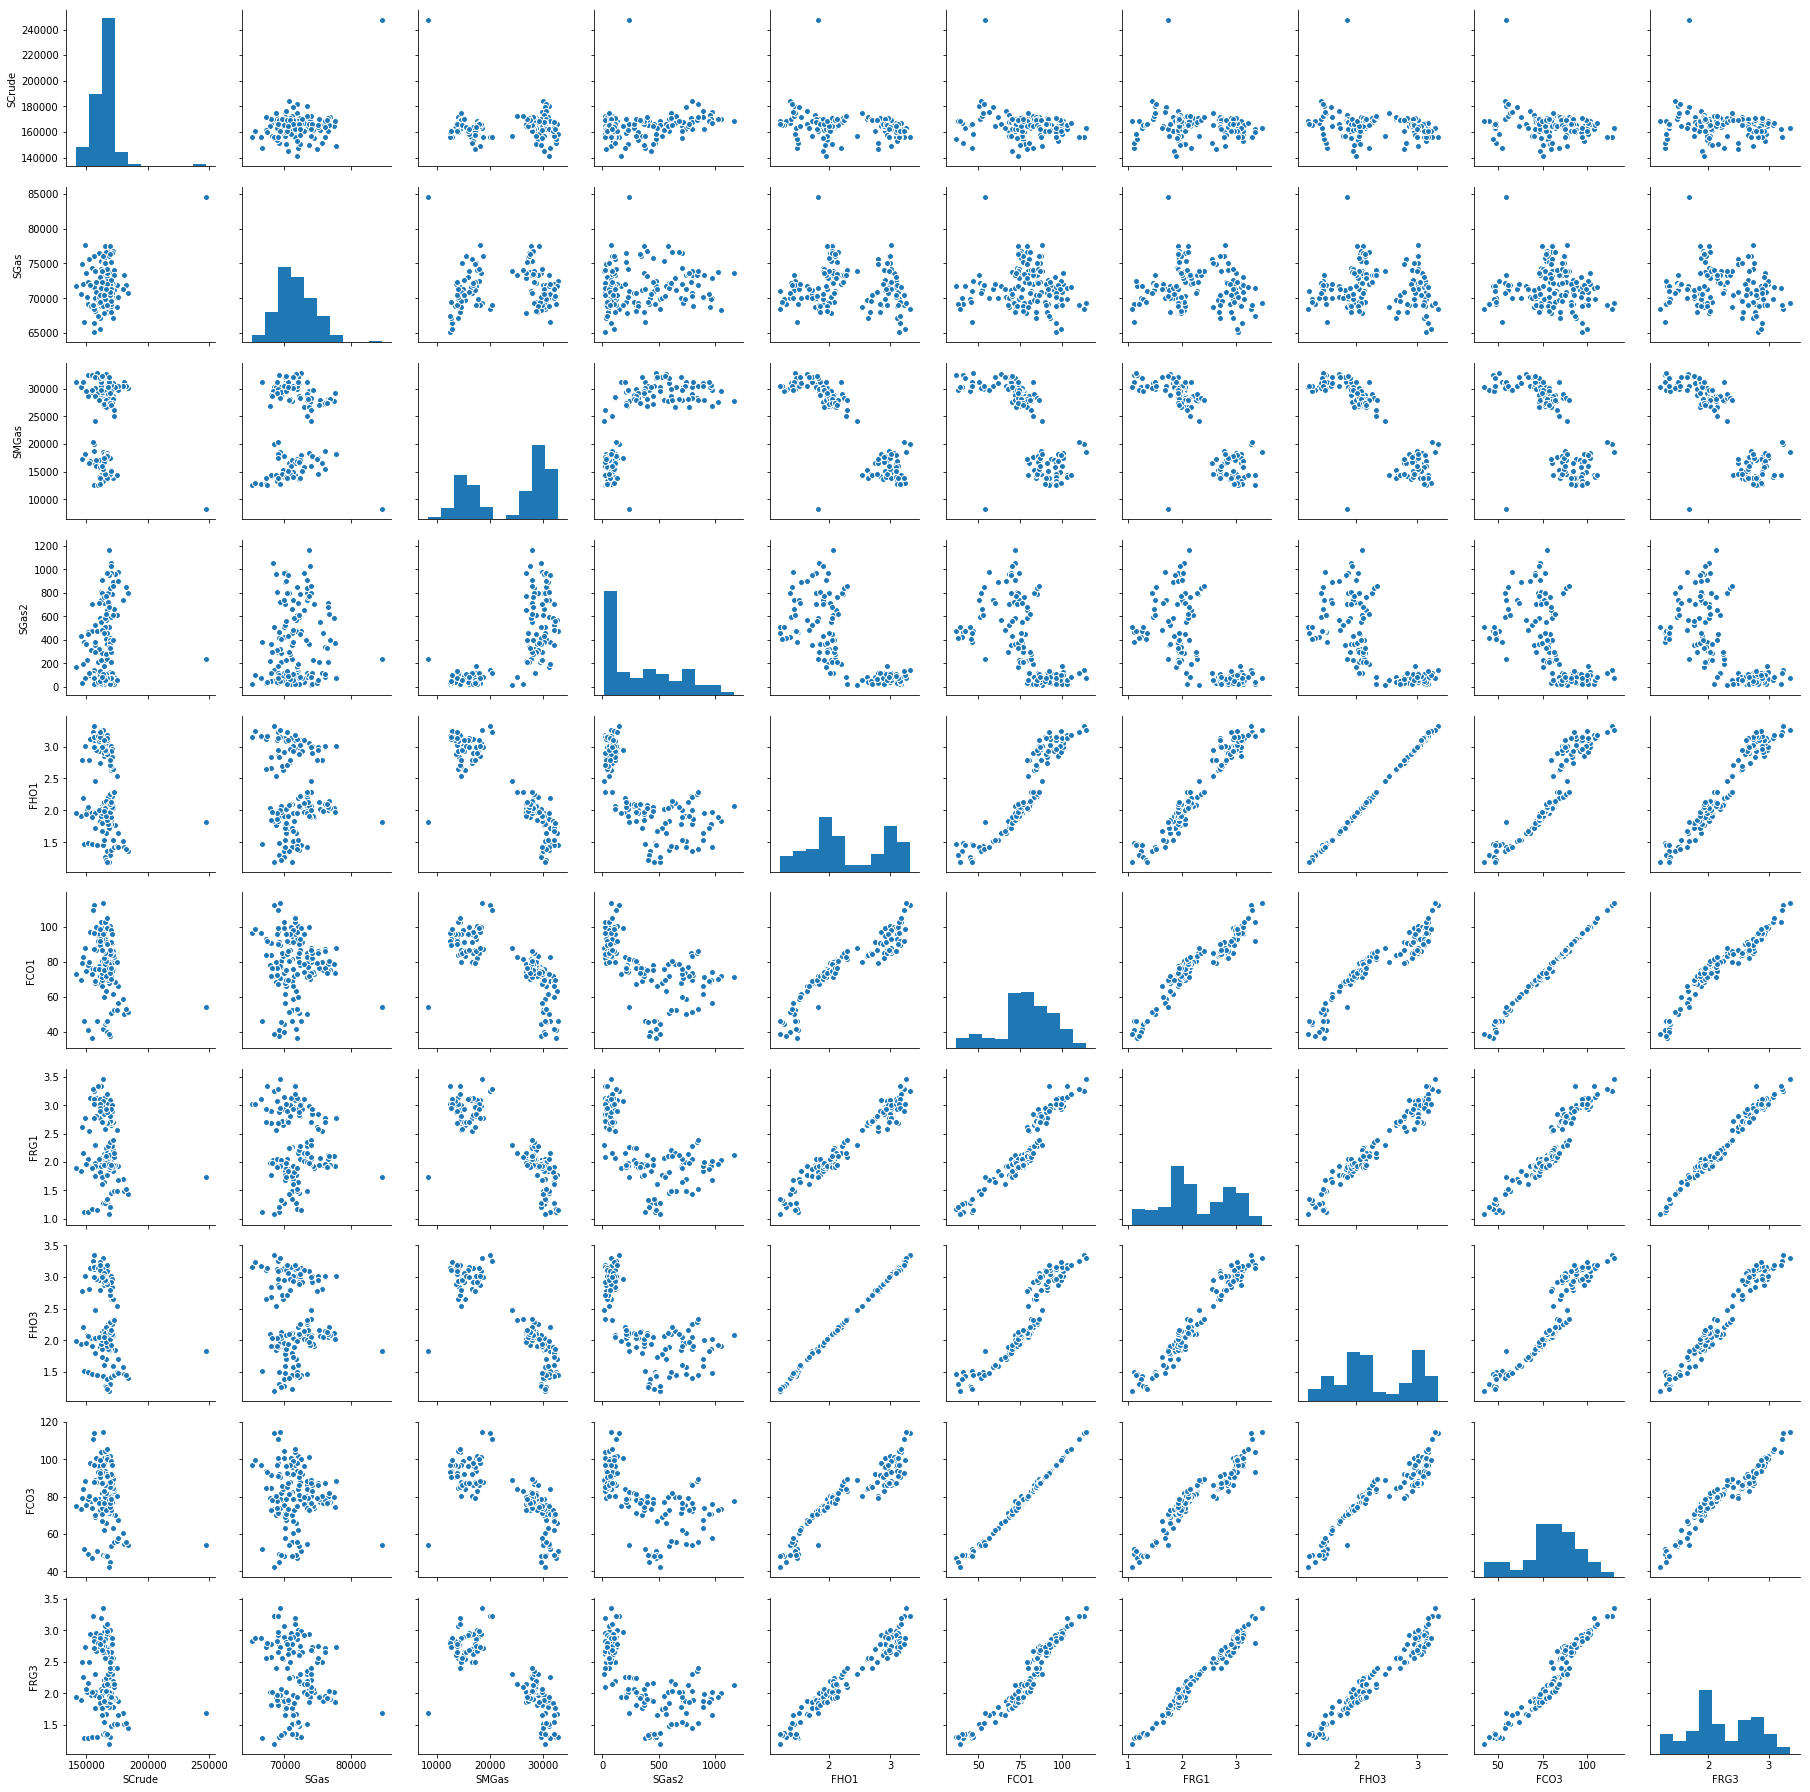

In [27]:
# To the beginning lets review the following assumptions before run the evaluation: 
# normal distribution of variables
# continiuous numeric variables
# variables linearly related

#lets filter the sf dataset
#'Weekly Gulf Coast (PADD 3) Ending Stocks excluding SPR of Crude Oil  (Thousand Barrels)'
#'Weekly Gulf Coast (PADD 3) Ending Stocks of Total Gasoline  (Thousand Barrels)'
#'Weekly Gulf Coast (PADD 3) Ending Stocks of Finished Motor Gasoline  (Thousand Barrels)'
#'Weekly Gulf Coast (PADD 3) Ending Stocks of Reformulated Motor Gasoline  (Thousand Barrels)'
#'New York Harbor No. 2 Heating Oil Future Contract 1 (Dollars per Gallon)'
#'Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)'
#'New York Harbor Reformulated RBOB Regular Gasoline Future Contract 1 (Dollars per Gallon)'
#'New York Harbor No. 2 Heating Oil Future Contract 3 (Dollars per Gallon)'
#'Cushing, OK Crude Oil Future Contract 3 (Dollars per Barrel)'
#'New York Harbor Reformulated RBOB Regular Gasoline Future Contract 3 (Dollars per Gallon)'

W=sf10[[
        'Weekly Gulf Coast (PADD 3) Ending Stocks excluding SPR of Crude Oil  (Thousand Barrels)',
        'Weekly Gulf Coast (PADD 3) Ending Stocks of Total Gasoline  (Thousand Barrels)',
        'Weekly Gulf Coast (PADD 3) Ending Stocks of Finished Motor Gasoline  (Thousand Barrels)',
        'Weekly Gulf Coast (PADD 3) Ending Stocks of Reformulated Motor Gasoline  (Thousand Barrels)',
        'New York Harbor No. 2 Heating Oil Future Contract 1 (Dollars per Gallon)',
        'Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)',
        'New York Harbor Reformulated RBOB Regular Gasoline Future Contract 1 (Dollars per Gallon)',
        'New York Harbor No. 2 Heating Oil Future Contract 3 (Dollars per Gallon)',
        'Cushing, OK Crude Oil Future Contract 3 (Dollars per Barrel)',
        'New York Harbor Reformulated RBOB Regular Gasoline Future Contract 3 (Dollars per Gallon)'  
    ]]

W=W.rename(columns={
                    'Weekly Gulf Coast (PADD 3) Ending Stocks excluding SPR of Crude Oil  (Thousand Barrels)':"SCrude",
                    'Weekly Gulf Coast (PADD 3) Ending Stocks of Total Gasoline  (Thousand Barrels)':"SGas",
                    'Weekly Gulf Coast (PADD 3) Ending Stocks of Finished Motor Gasoline  (Thousand Barrels)':"SMGas",
                    'Weekly Gulf Coast (PADD 3) Ending Stocks of Reformulated Motor Gasoline  (Thousand Barrels)':"SGas2",
                    'New York Harbor No. 2 Heating Oil Future Contract 1 (Dollars per Gallon)':"FHO1",
                    'Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)':"FCO1",
                    'New York Harbor Reformulated RBOB Regular Gasoline Future Contract 1 (Dollars per Gallon)':"FRG1",
                    'New York Harbor No. 2 Heating Oil Future Contract 3 (Dollars per Gallon)':"FHO3",
                    'Cushing, OK Crude Oil Future Contract 3 (Dollars per Barrel)':"FCO3",
                    'New York Harbor Reformulated RBOB Regular Gasoline Future Contract 3 (Dollars per Gallon)':"FRG3"})

W = W.replace({0:np.nan})
W.dropna(inplace=True)

sb.pairplot(W,dropna=True)
plt.show()

In [20]:
#finally...
corr=W.corr()
W.corr()

,SCrude,SGas,SMGas,SGas2,FHO1,FCO1,FRG1,FHO3,FCO3,FRG3
SCrude,1.000000,0.287883,-0.087739,0.210861,-0.190797,-0.199598,-0.135268,-0.190603,-0.217865,-0.170590
SGas,0.287883,1.000000,0.071696,0.092045,-0.069729,-0.066959,-0.112148,-0.069196,-0.079255,-0.099063
SMGas,-0.087739,0.071696,1.000000,0.735639,-0.897769,-0.717978,-0.865012,-0.890323,-0.713459,-0.837909
SGas2,0.210861,0.092045,0.735639,1.000000,-0.724781,-0.581291,-0.640823,-0.715218,-0.580131,-0.651877
FHO1,-0.190797,-0.069729,-0.897769,-0.724781,1.000000,0.914763,0.972228,0.999325,0.918597,0.971636
FCO1,-0.199598,-0.066959,-0.717978,-0.581291,0.914763,1.000000,0.944323,0.924021,0.996721,0.956989
FRG1,-0.135268,-0.112148,-0.865012,-0.640823,0.972228,0.944323,1.000000,0.975685,0.943921,0.988465
FHO3,-0.190603,-0.069196,-0.890323,-0.715218,0.999325,0.924021,0.975685,1.000000,0.927380,0.974902
FCO3,-0.217865,-0.079255,-0.713459,-0.580131,0.918597,0.996721,0.943921,0.927380,1.000000,0.959577
FRG3,-0.170590,-0.099063,-0.837909,-0.651877,0.971636,0.956989,0.988465,0.974902,0.959577,1.000000


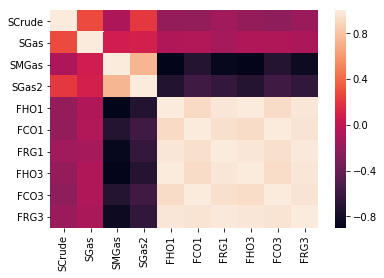

In [21]:
#graphically
sb.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)
plt.show()

# Correlación - Stock y Precios Futuros (4 años)

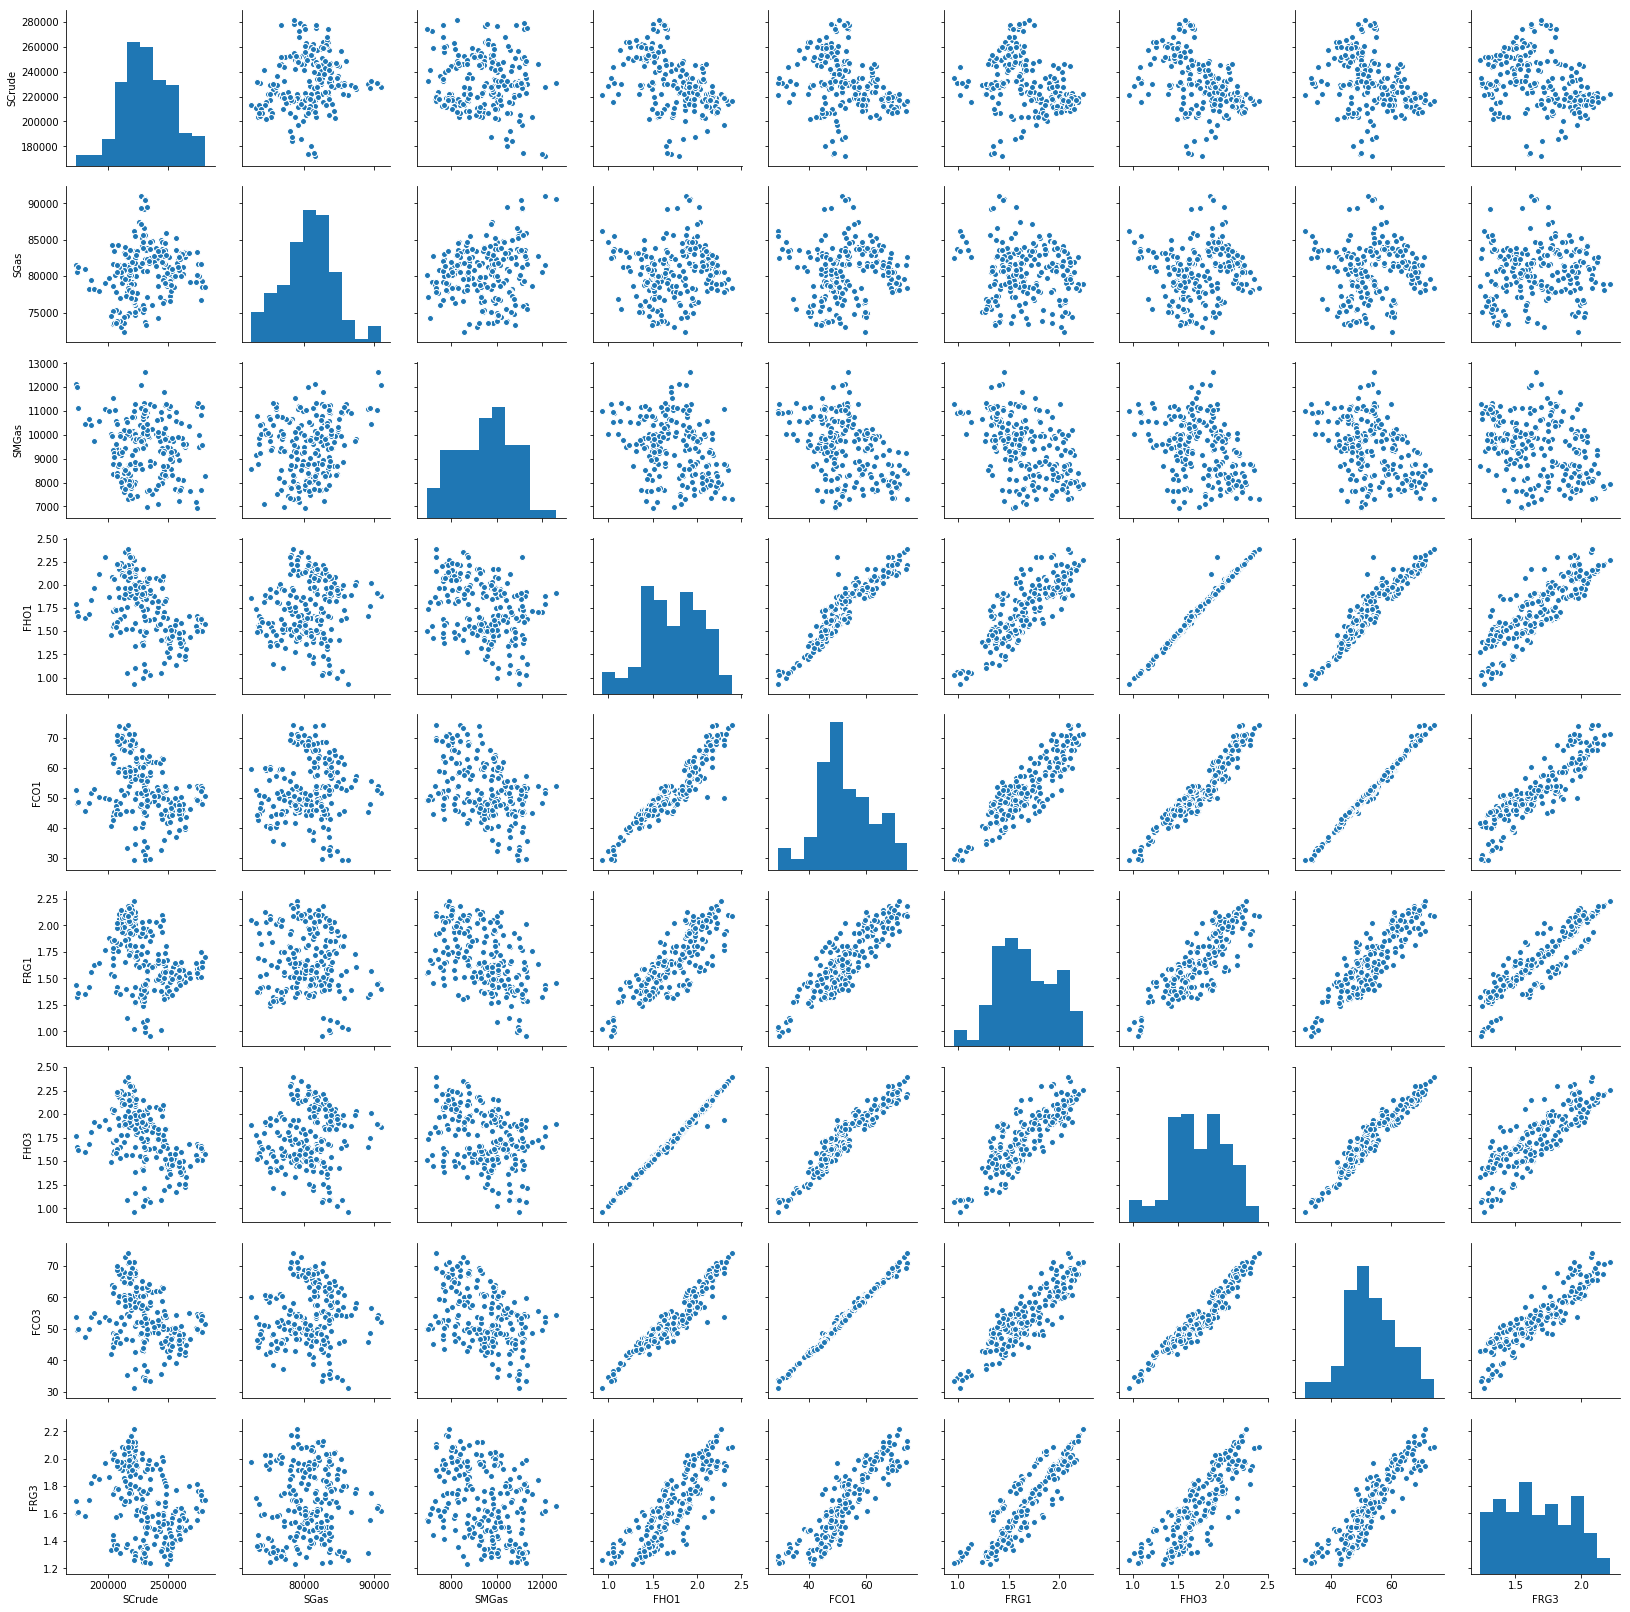

In [25]:
# To the beginning lets review the following assumptions before run the evaluation: 
# normal distribution of variables
# continiuous numeric variables
# variables linearly related

#lets filter the sf dataset
#'Weekly Gulf Coast (PADD 3) Ending Stocks excluding SPR of Crude Oil  (Thousand Barrels)'
#'Weekly Gulf Coast (PADD 3) Ending Stocks of Total Gasoline  (Thousand Barrels)'
#'Weekly Gulf Coast (PADD 3) Ending Stocks of Finished Motor Gasoline  (Thousand Barrels)'
#'Weekly Gulf Coast (PADD 3) Ending Stocks of Reformulated Motor Gasoline  (Thousand Barrels)'
#'New York Harbor No. 2 Heating Oil Future Contract 1 (Dollars per Gallon)'
#'Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)'
#'New York Harbor Reformulated RBOB Regular Gasoline Future Contract 1 (Dollars per Gallon)'
#'New York Harbor No. 2 Heating Oil Future Contract 3 (Dollars per Gallon)'
#'Cushing, OK Crude Oil Future Contract 3 (Dollars per Barrel)'
#'New York Harbor Reformulated RBOB Regular Gasoline Future Contract 3 (Dollars per Gallon)'

X=sf4[[
        'Weekly Gulf Coast (PADD 3) Ending Stocks excluding SPR of Crude Oil  (Thousand Barrels)',
        'Weekly Gulf Coast (PADD 3) Ending Stocks of Total Gasoline  (Thousand Barrels)',
        'Weekly Gulf Coast (PADD 3) Ending Stocks of Finished Motor Gasoline  (Thousand Barrels)',
        'New York Harbor No. 2 Heating Oil Future Contract 1 (Dollars per Gallon)',
        'Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)',
        'New York Harbor Reformulated RBOB Regular Gasoline Future Contract 1 (Dollars per Gallon)',
        'New York Harbor No. 2 Heating Oil Future Contract 3 (Dollars per Gallon)',
        'Cushing, OK Crude Oil Future Contract 3 (Dollars per Barrel)',
        'New York Harbor Reformulated RBOB Regular Gasoline Future Contract 3 (Dollars per Gallon)'  
    ]]

X=X.rename(columns={
                    'Weekly Gulf Coast (PADD 3) Ending Stocks excluding SPR of Crude Oil  (Thousand Barrels)':"SCrude",
                    'Weekly Gulf Coast (PADD 3) Ending Stocks of Total Gasoline  (Thousand Barrels)':"SGas",
                    'Weekly Gulf Coast (PADD 3) Ending Stocks of Finished Motor Gasoline  (Thousand Barrels)':"SMGas",
                    'New York Harbor No. 2 Heating Oil Future Contract 1 (Dollars per Gallon)':"FHO1",
                    'Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)':"FCO1",
                    'New York Harbor Reformulated RBOB Regular Gasoline Future Contract 1 (Dollars per Gallon)':"FRG1",
                    'New York Harbor No. 2 Heating Oil Future Contract 3 (Dollars per Gallon)':"FHO3",
                    'Cushing, OK Crude Oil Future Contract 3 (Dollars per Barrel)':"FCO3",
                    'New York Harbor Reformulated RBOB Regular Gasoline Future Contract 3 (Dollars per Gallon)':"FRG3"})

X = X.replace({0:np.nan})
X.dropna(inplace=True)

sb.pairplot(X,dropna=True)
plt.show()

In [26]:
#finally...
corr=X.corr()
X.corr()

,SCrude,SGas,SMGas,FHO1,FCO1,FRG1,FHO3,FCO3,FRG3
SCrude,1.000000,0.187101,-0.093146,-0.464369,-0.312310,-0.282331,-0.445554,-0.330447,-0.331682
SGas,0.187101,1.000000,0.178813,0.085601,0.071933,-0.113335,0.067704,0.055633,0.085805
SMGas,-0.093146,0.178813,1.000000,-0.357998,-0.448171,-0.500910,-0.379564,-0.420828,-0.338251
FHO1,-0.464369,0.085601,-0.357998,1.000000,0.934534,0.826273,0.994001,0.942005,0.847334
FCO1,-0.312310,0.071933,-0.448171,0.934534,1.000000,0.882341,0.953044,0.996220,0.888283
FRG1,-0.282331,-0.113335,-0.500910,0.826273,0.882341,1.000000,0.842004,0.887164,0.900119
FHO3,-0.445554,0.067704,-0.379564,0.994001,0.953044,0.842004,1.000000,0.958659,0.845614
FCO3,-0.330447,0.055633,-0.420828,0.942005,0.996220,0.887164,0.958659,1.000000,0.905221
FRG3,-0.331682,0.085805,-0.338251,0.847334,0.888283,0.900119,0.845614,0.905221,1.000000


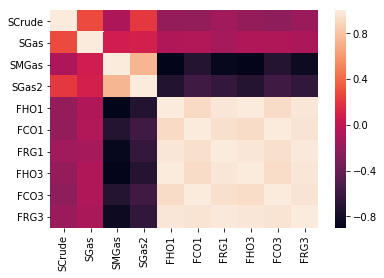

In [21]:
#graphically
sb.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)
plt.show()

# Correlación - Stock y Precios Gas (10 años)

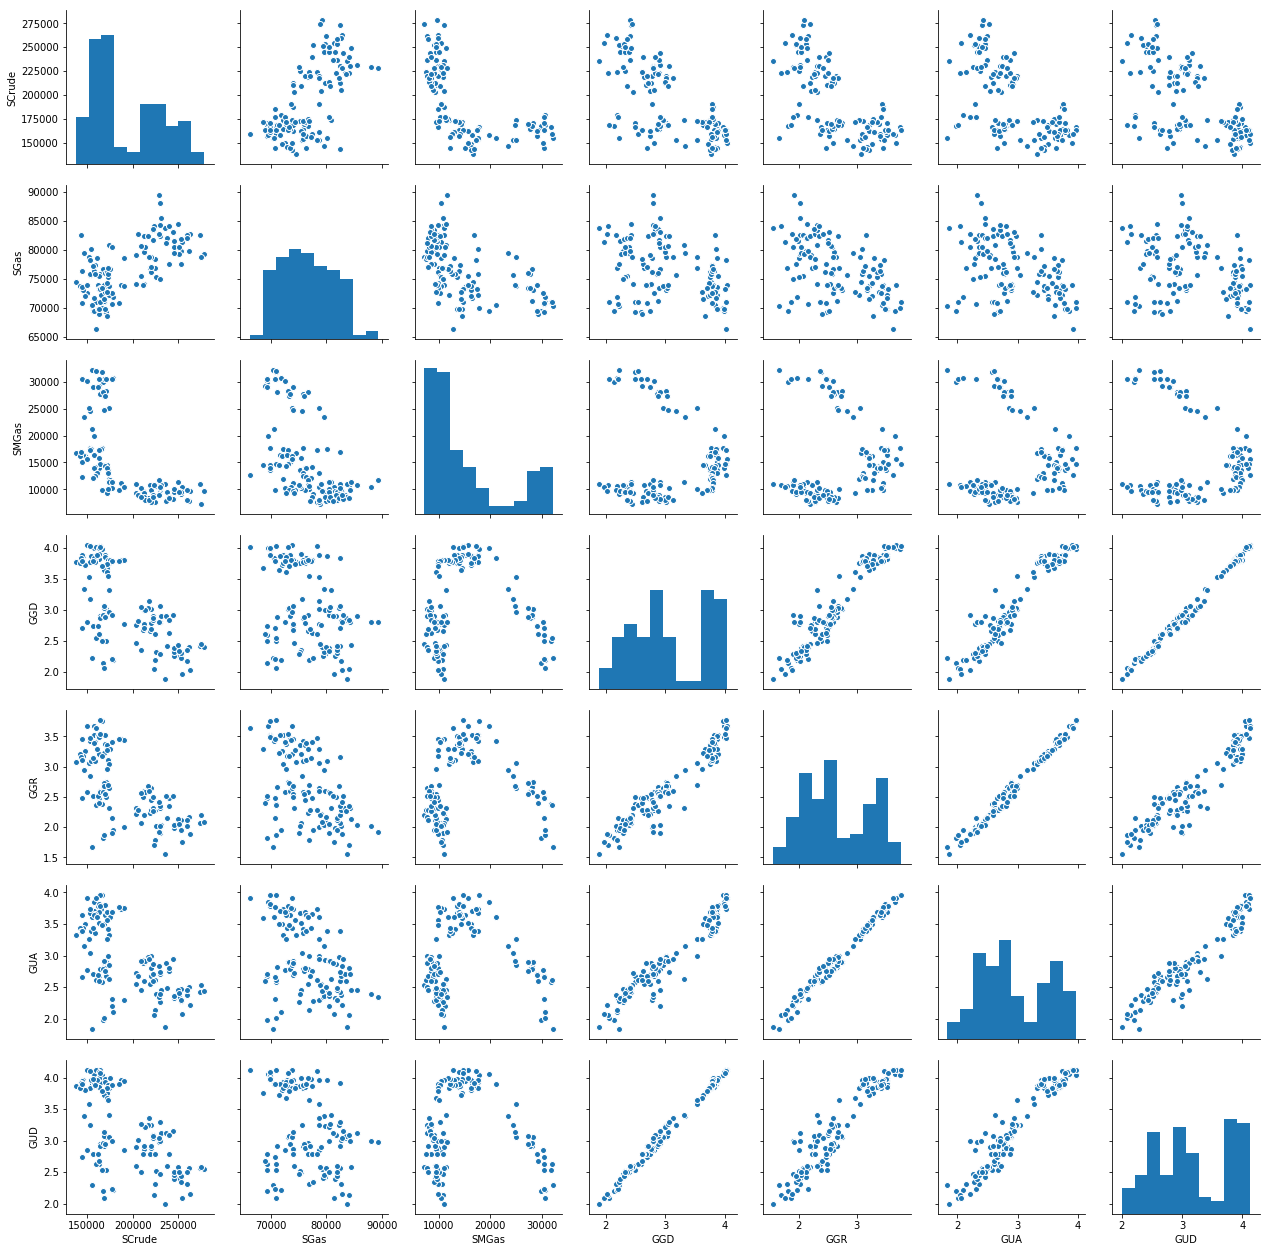

In [31]:
# To the beginning lets review the following assumptions before run the evaluation: 
# normal distribution of variables
# continiuous numeric variables
# variables linearly related

#lets filter the sg3 dataset
#'Weekly Gulf Coast (PADD 3) Ending Stocks excluding SPR of Crude Oil  (Thousand Barrels)'
#'Weekly Gulf Coast (PADD 3) Ending Stocks of Total Gasoline  (Thousand Barrels)'
#'Weekly Gulf Coast (PADD 3) Ending Stocks of Finished Motor Gasoline  (Thousand Barrels)'
#'Weekly Gulf Coast (PADD 3) Ending Stocks of Reformulated Motor Gasoline  (Thousand Barrels)'
# 'Weekly Gulf Coast No 2 Diesel Retail Prices  (Dollars per Gallon)'
# 'Weekly Gulf Coast Regular All Formulations Retail Gasoline Prices  (Dollars per Gallon)'
# 'Weekly U.S. All Grades All Formulations Retail Gasoline Prices  (Dollars per Gallon)'
# 'Weekly U.S. No 2 Diesel Retail Prices  (Dollars per Gallon)'


Y=sg10[[
        'Weekly Gulf Coast (PADD 3) Ending Stocks excluding SPR of Crude Oil  (Thousand Barrels)',
        'Weekly Gulf Coast (PADD 3) Ending Stocks of Total Gasoline  (Thousand Barrels)',
        'Weekly Gulf Coast (PADD 3) Ending Stocks of Finished Motor Gasoline  (Thousand Barrels)',
        'Weekly Gulf Coast No 2 Diesel Retail Prices  (Dollars per Gallon)',
        'Weekly Gulf Coast Regular All Formulations Retail Gasoline Prices  (Dollars per Gallon)',
        'Weekly U.S. All Grades All Formulations Retail Gasoline Prices  (Dollars per Gallon)',
        'Weekly U.S. No 2 Diesel Retail Prices  (Dollars per Gallon)' 
    ]]

Y=Y.rename(columns={
                    'Weekly Gulf Coast (PADD 3) Ending Stocks excluding SPR of Crude Oil  (Thousand Barrels)':"SCrude",
                    'Weekly Gulf Coast (PADD 3) Ending Stocks of Total Gasoline  (Thousand Barrels)':"SGas",
                    'Weekly Gulf Coast (PADD 3) Ending Stocks of Finished Motor Gasoline  (Thousand Barrels)':"SMGas",
                    'Weekly Gulf Coast No 2 Diesel Retail Prices  (Dollars per Gallon)':"GGD",
                    'Weekly Gulf Coast Regular All Formulations Retail Gasoline Prices  (Dollars per Gallon)':"GGR",
                    'Weekly U.S. All Grades All Formulations Retail Gasoline Prices  (Dollars per Gallon)':"GUA",
                    'Weekly U.S. No 2 Diesel Retail Prices  (Dollars per Gallon)':"GUD"})

Y = Y.replace({0:np.nan})
Y.dropna(inplace=True)

sb.pairplot(Y,dropna=True)
plt.show()

### Correlation Matrix: precios futuros / stock

In [32]:
#finally...
corr3=Y.corr()
Y.corr()

,SCrude,SGas,SMGas,GGD,GGR,GUA,GUD
SCrude,1.000000,0.677528,-0.618811,-0.678749,-0.681334,-0.612362,-0.625630
SGas,0.677528,1.000000,-0.577063,-0.367865,-0.510660,-0.438704,-0.309218
SMGas,-0.618811,-0.577063,1.000000,-0.029157,0.071944,-0.038601,-0.100141
GGD,-0.678749,-0.367865,-0.029157,1.000000,0.954678,0.960492,0.995646
GGR,-0.681334,-0.510660,0.071944,0.954678,1.000000,0.992061,0.940461
GUA,-0.612362,-0.438704,-0.038601,0.960492,0.992061,1.000000,0.956014
GUD,-0.625630,-0.309218,-0.100141,0.995646,0.940461,0.956014,1.000000


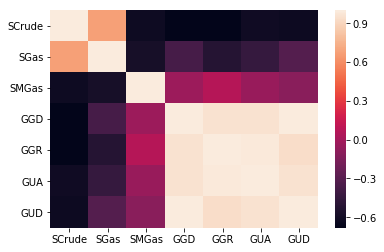

In [34]:
#graphically
sb.heatmap(corr3,xticklabels=Y.corr().columns.values,yticklabels=Y.corr().columns.values)
plt.show()

# Correlación - Stock y Precios Gas (4 años)

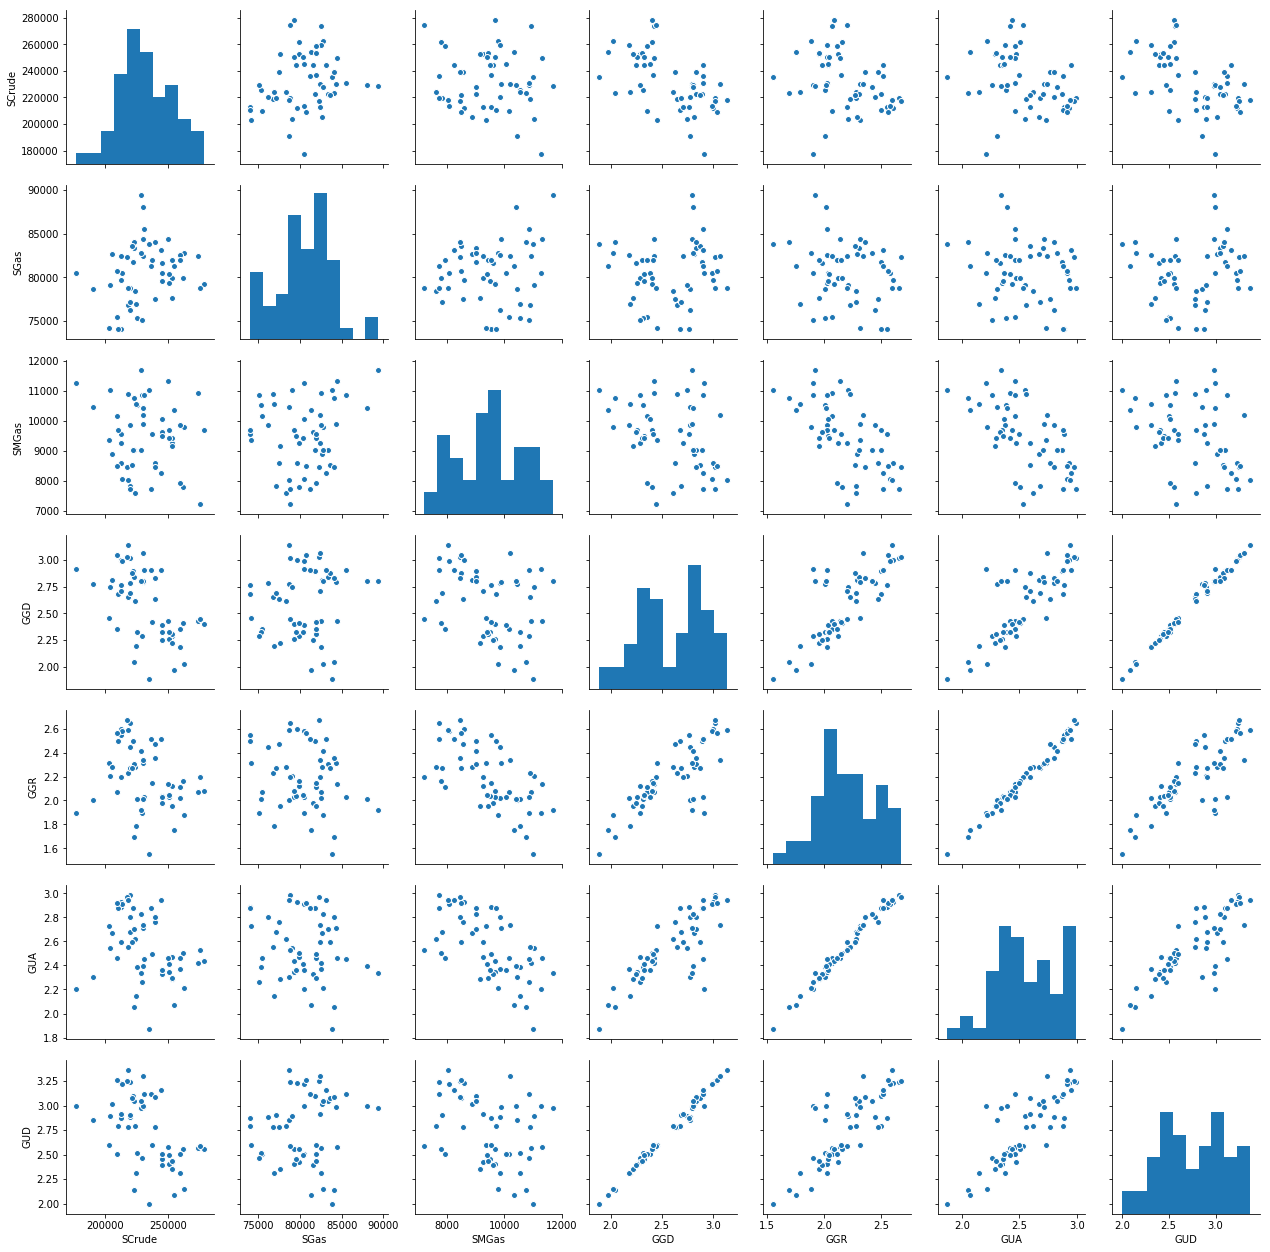

In [35]:
# To the beginning lets review the following assumptions before run the evaluation: 
# normal distribution of variables
# continiuous numeric variables
# variables linearly related

#lets filter the sg3 dataset
#'Weekly Gulf Coast (PADD 3) Ending Stocks excluding SPR of Crude Oil  (Thousand Barrels)'
#'Weekly Gulf Coast (PADD 3) Ending Stocks of Total Gasoline  (Thousand Barrels)'
#'Weekly Gulf Coast (PADD 3) Ending Stocks of Finished Motor Gasoline  (Thousand Barrels)'
#'Weekly Gulf Coast (PADD 3) Ending Stocks of Reformulated Motor Gasoline  (Thousand Barrels)'
# 'Weekly Gulf Coast No 2 Diesel Retail Prices  (Dollars per Gallon)'
# 'Weekly Gulf Coast Regular All Formulations Retail Gasoline Prices  (Dollars per Gallon)'
# 'Weekly U.S. All Grades All Formulations Retail Gasoline Prices  (Dollars per Gallon)'
# 'Weekly U.S. No 2 Diesel Retail Prices  (Dollars per Gallon)'


Z=sg4[[
        'Weekly Gulf Coast (PADD 3) Ending Stocks excluding SPR of Crude Oil  (Thousand Barrels)',
        'Weekly Gulf Coast (PADD 3) Ending Stocks of Total Gasoline  (Thousand Barrels)',
        'Weekly Gulf Coast (PADD 3) Ending Stocks of Finished Motor Gasoline  (Thousand Barrels)',
        'Weekly Gulf Coast No 2 Diesel Retail Prices  (Dollars per Gallon)',
        'Weekly Gulf Coast Regular All Formulations Retail Gasoline Prices  (Dollars per Gallon)',
        'Weekly U.S. All Grades All Formulations Retail Gasoline Prices  (Dollars per Gallon)',
        'Weekly U.S. No 2 Diesel Retail Prices  (Dollars per Gallon)' 
    ]]

Z=Z.rename(columns={
                    'Weekly Gulf Coast (PADD 3) Ending Stocks excluding SPR of Crude Oil  (Thousand Barrels)':"SCrude",
                    'Weekly Gulf Coast (PADD 3) Ending Stocks of Total Gasoline  (Thousand Barrels)':"SGas",
                    'Weekly Gulf Coast (PADD 3) Ending Stocks of Finished Motor Gasoline  (Thousand Barrels)':"SMGas",
                    'Weekly Gulf Coast No 2 Diesel Retail Prices  (Dollars per Gallon)':"GGD",
                    'Weekly Gulf Coast Regular All Formulations Retail Gasoline Prices  (Dollars per Gallon)':"GGR",
                    'Weekly U.S. All Grades All Formulations Retail Gasoline Prices  (Dollars per Gallon)':"GUA",
                    'Weekly U.S. No 2 Diesel Retail Prices  (Dollars per Gallon)':"GUD"})

Z = Z.replace({0:np.nan})
Z.dropna(inplace=True)

sb.pairplot(Z,dropna=True)
plt.show()

In [36]:
#finally...
corr4=Z.corr()
Z.corr()

,SCrude,SGas,SMGas,GGD,GGR,GUA,GUD
SCrude,1.000000,0.222288,-0.113889,-0.549024,-0.302964,-0.307234,-0.513663
SGas,0.222288,1.000000,0.150139,0.114964,-0.195994,-0.159712,0.147723
SMGas,-0.113889,0.150139,1.000000,-0.332640,-0.632696,-0.617578,-0.365737
GGD,-0.549024,0.114964,-0.332640,1.000000,0.795835,0.808541,0.994821
GGR,-0.302964,-0.195994,-0.632696,0.795835,1.000000,0.990805,0.802551
GUA,-0.307234,-0.159712,-0.617578,0.808541,0.990805,1.000000,0.821197
GUD,-0.513663,0.147723,-0.365737,0.994821,0.802551,0.821197,1.000000


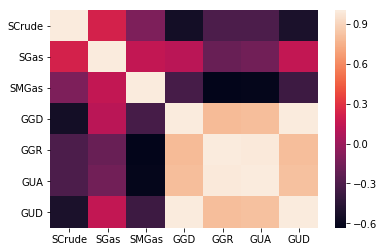

In [37]:
#graphically
sb.heatmap(corr4,xticklabels=Z.corr().columns.values,yticklabels=Z.corr().columns.values)
plt.show()